In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df=pd.read_csv(r'C:\Users\joshu\OneDrive\Desktop\Joshua Kim Kwan\2025\AY2526 Semester 1\QF5210 Financial Time Series_ Theory and Computation\Group Assignment for AY2526 Sem 1\Platts_Export_Data.csv')

df.head()


,Timestamp,PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : CLOSE,PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : HIGH,PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : LOW
0,10/17/2025,361.20,361.22,361.18
1,10/16/2025,369.96,369.98,369.94
2,10/15/2025,368.59,368.61,368.57
3,10/14/2025,363.28,363.30,363.26
4,10/13/2025,374.79,374.81,374.77


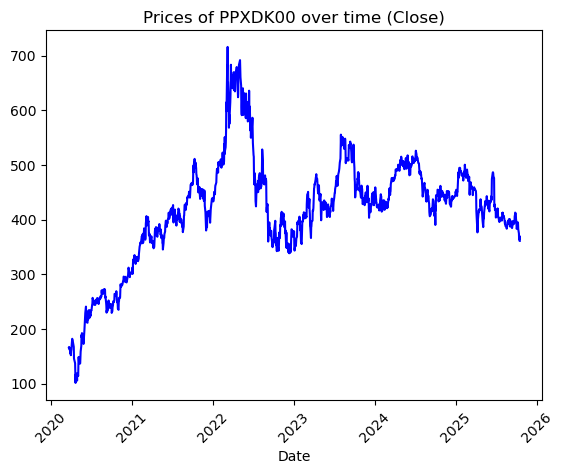

<Figure size 80000x80000 with 0 Axes>

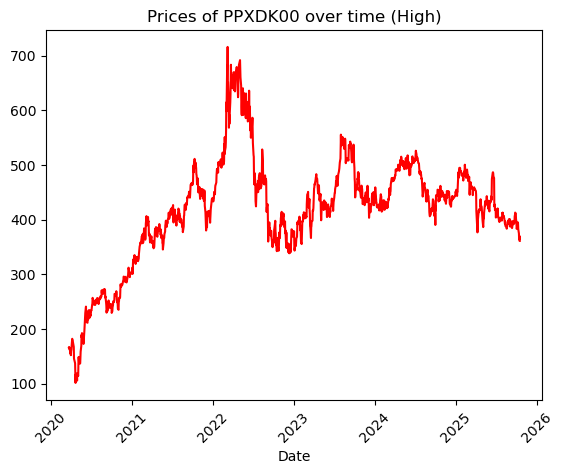

<Figure size 80000x80000 with 0 Axes>

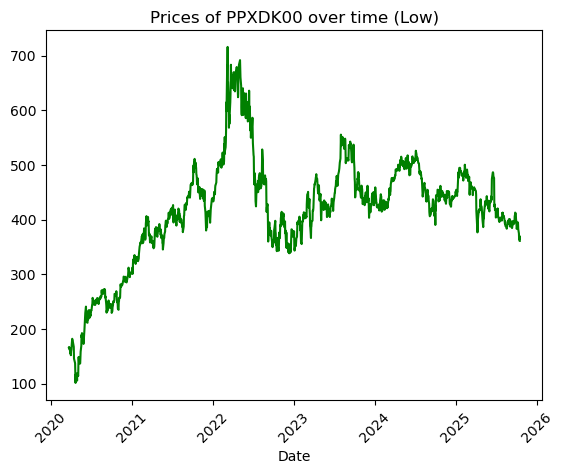

<Figure size 80000x80000 with 0 Axes>

In [5]:

df['Timestamp']=pd.to_datetime(df['Timestamp'],format='%m/%d/%Y')
df['Timestamp'] # Convert to timestamp format required to plot on graph to visualise data

Dates = np.array(df['Timestamp'])
Close_price = np.array(df['PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : CLOSE'])
High_price = np.array(df['PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : HIGH'])
Low_price = np.array(df['PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : LOW'])

plt.plot(Dates, Close_price, label='Close price', color='blue')
plt.xlabel("Date")
plt.title('Prices of PPXDK00 over time (Close)')
plt.xticks(rotation=45) # Rotate labels on x axis
plt.figure(figsize=(800, 800)) # Adjust width and height as needed
plt.show()
plt.plot(Dates, High_price, label='High price', color='red')
plt.xlabel("Date")
plt.title('Prices of PPXDK00 over time (High)')
plt.xticks(rotation=45) # Rotate labels on x axis
plt.figure(figsize=(800, 800)) # Adjust width and height as needed
plt.show()
plt.plot(Dates, Low_price, label='Low price', color='green')
plt.xlabel("Date")
plt.title('Prices of PPXDK00 over time (Low)')
plt.xticks(rotation=45) # Rotate labels on x axis
plt.figure(figsize=(800, 800)) # Adjust width and height as needed
plt.show()

# How do you extend the y axis so that you can see the difference between the graphs rather than have them overlap?

In [6]:
# Get an array for returns and log returns based on the close price (lecture notes say close price useful), see slide 13 of L3
# The csv has 1400 rows

close_returns = []
log_close_returns = []
for price in range(1,1400):
    r = (df['PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : CLOSE'][price] / df['PPXDK00 |FO 380 CST 3.5%S FOB SPORE CARGO(USD/MT) : CLOSE'][price-1]) - 1
    close_returns += [r]
    log_close_returns += [math.log(r+1)]

print(close_returns[:10])
print(log_close_returns[:10])

[np.float64(0.024252491694352063), np.float64(-0.0037031030381663443), np.float64(-0.014406250847825541), np.float64(0.031683549878881445), np.float64(0.0209183809600042), np.float64(0.027650733084180423), np.float64(0.0049591821164265415), np.float64(-0.0071616560380606265), np.float64(-0.012158132184640458), np.float64(-0.011301475900505675)]
[0.023963070143228852, -0.003709976498222648, -0.014511028398141066, 0.031191982322152, 0.020702595693307457, 0.027275355494408706, 0.004946925876709535, -0.007187423796919484, -0.012232646862550437, -0.011365822848956998]


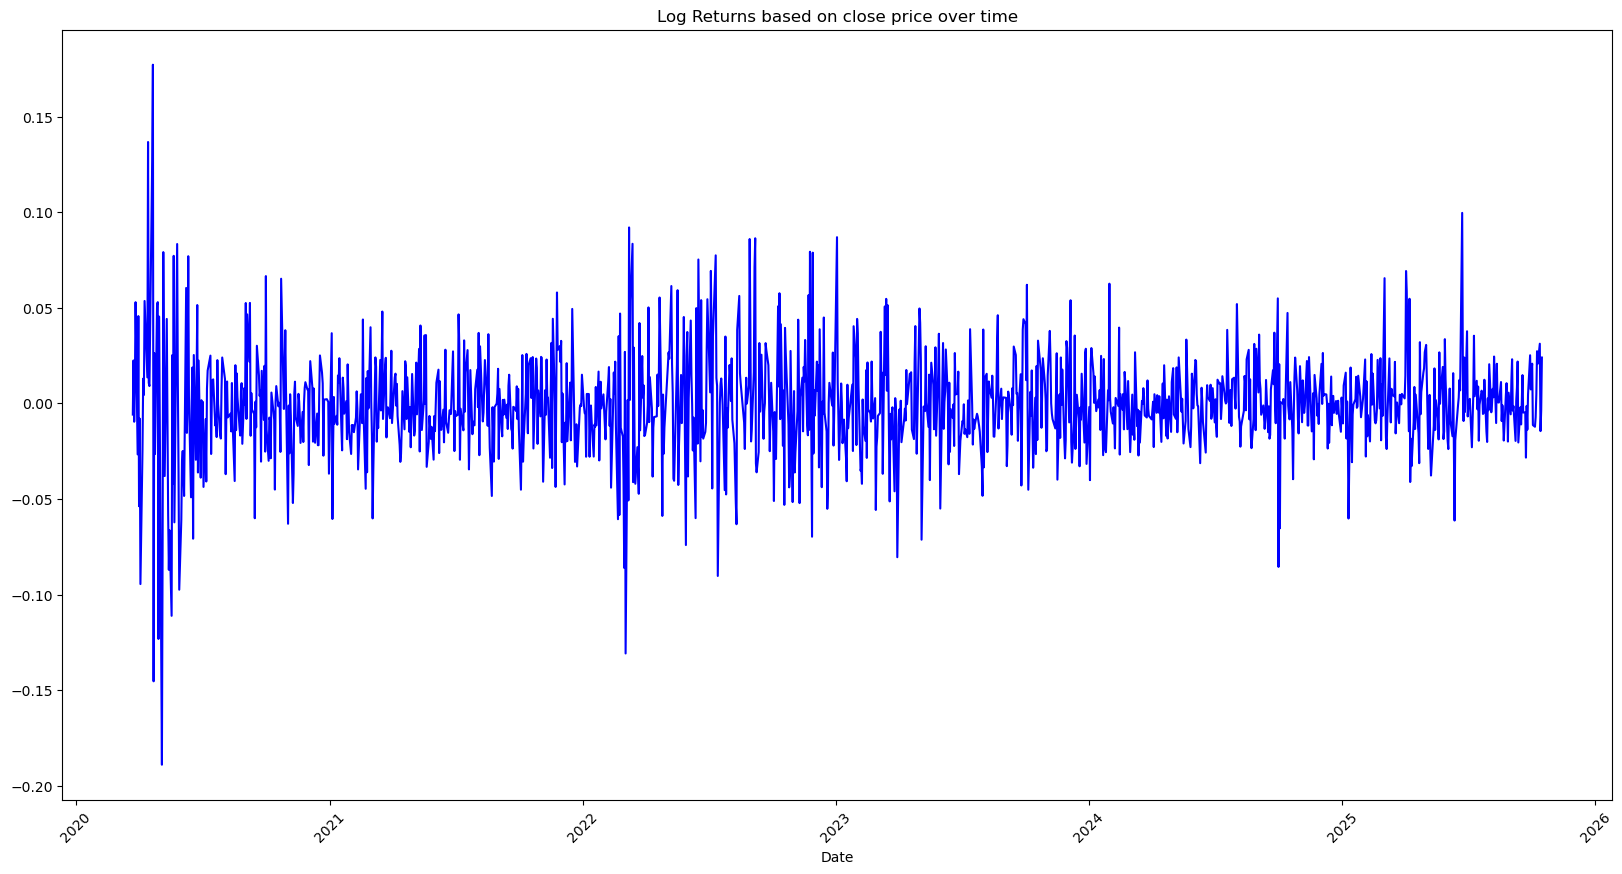

In [7]:
Log_Close_Returns = np.array(log_close_returns)

plt.figure(figsize=(20, 10)) # adjusts the figure of the graph, (width, height)
plt.plot(Dates[1:], Log_Close_Returns, label='Log Returns based on close price', color='blue')
plt.xlabel("Date")
plt.title('Log Returns based on close price over time')
plt.xticks(rotation=45) # Rotate labels on x axis
plt.show()

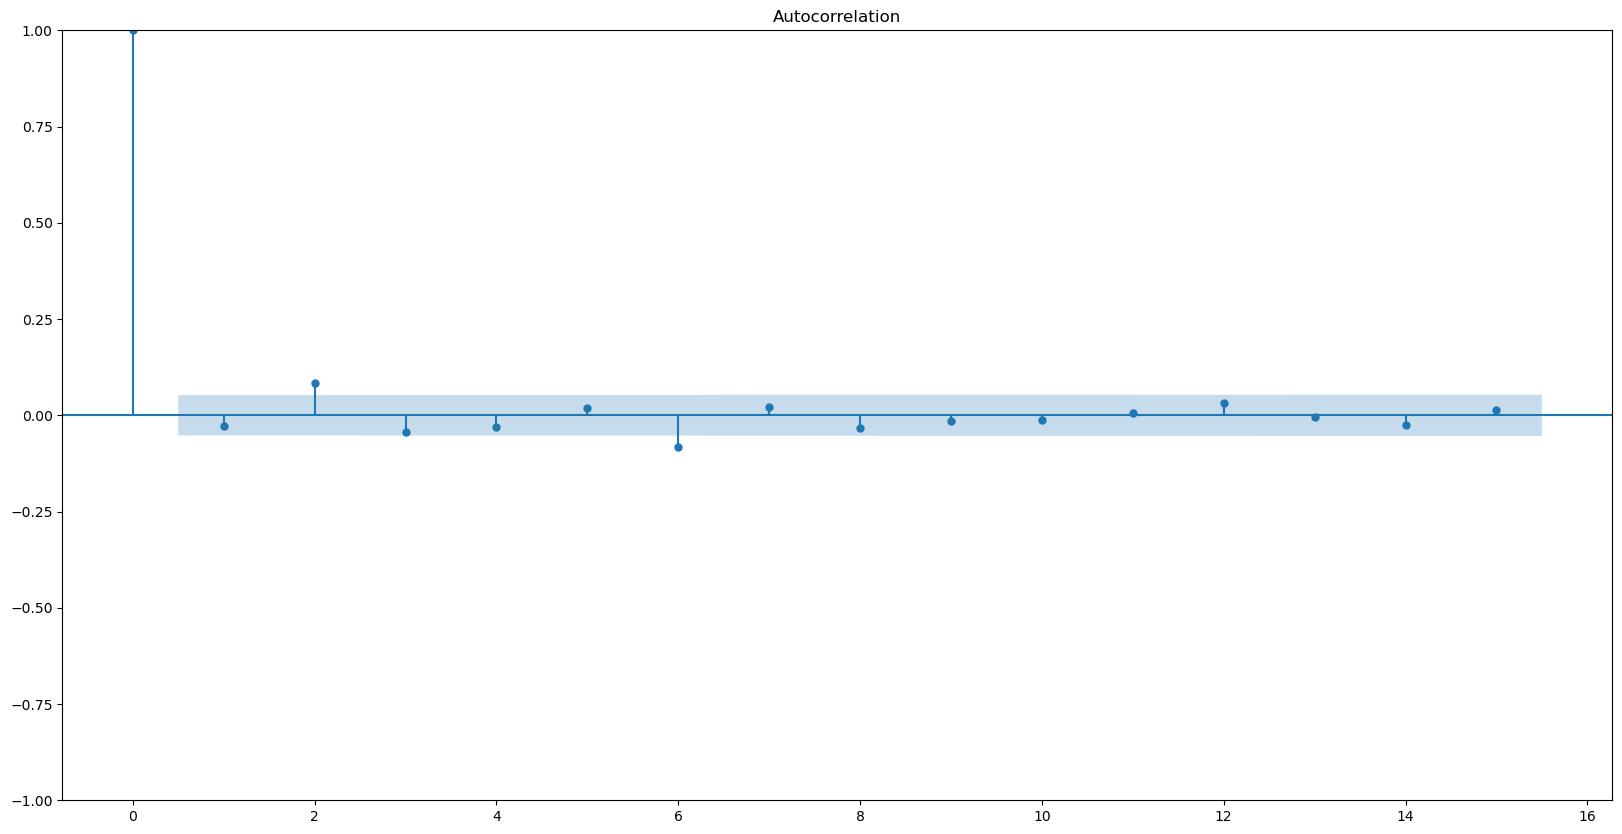

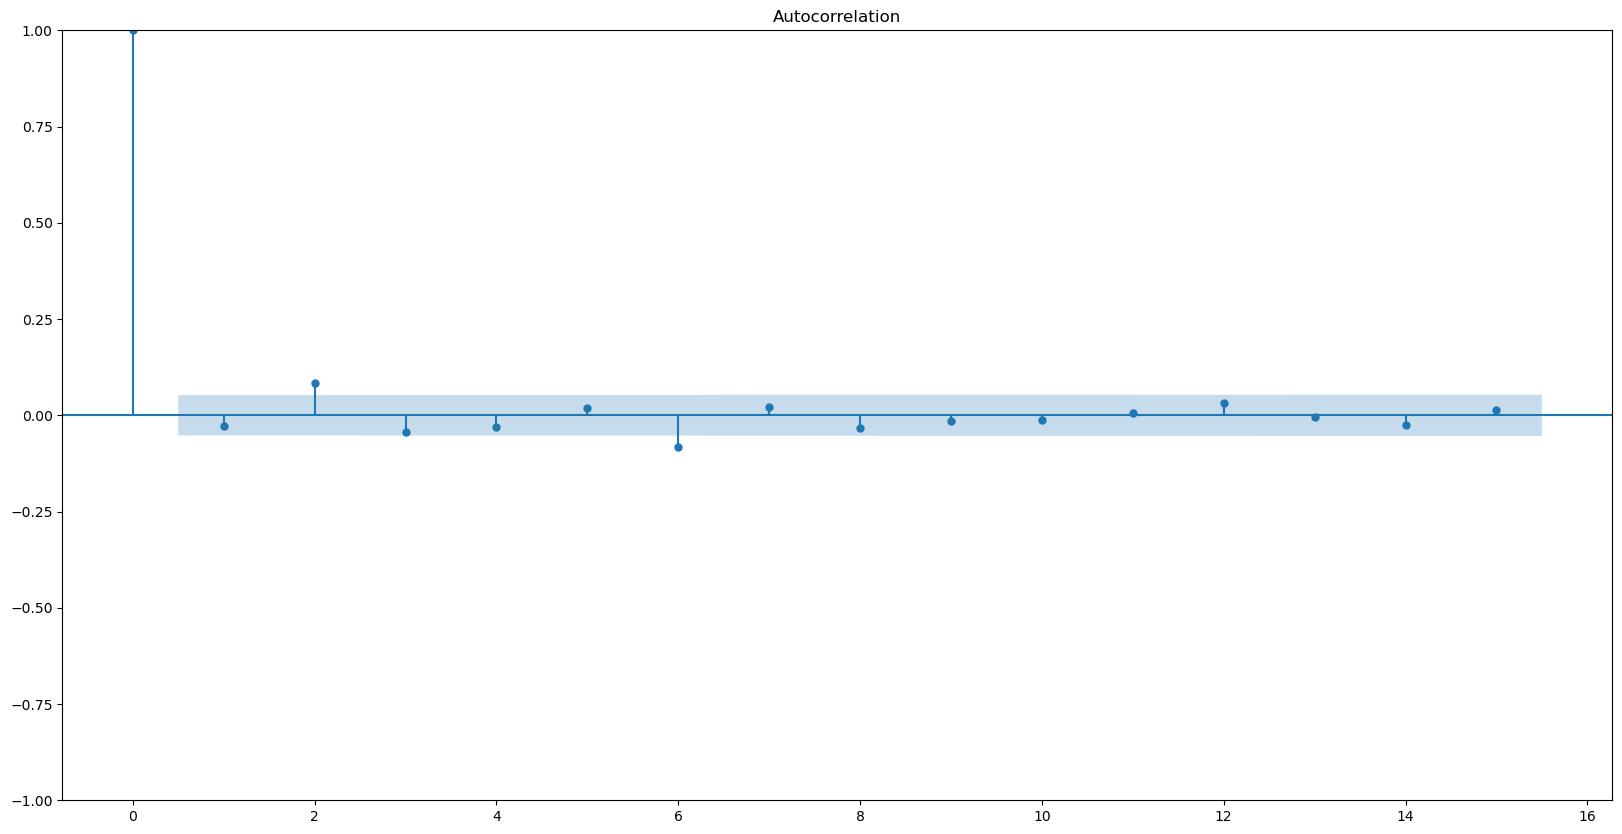

In [17]:
N, M = 20, 10
fig, ax = plt.subplots(figsize=(N, M))
acf_values_high_price = acf(log_close_returns,nlags=15)
plot_acf(log_close_returns,lags=15,ax=ax)

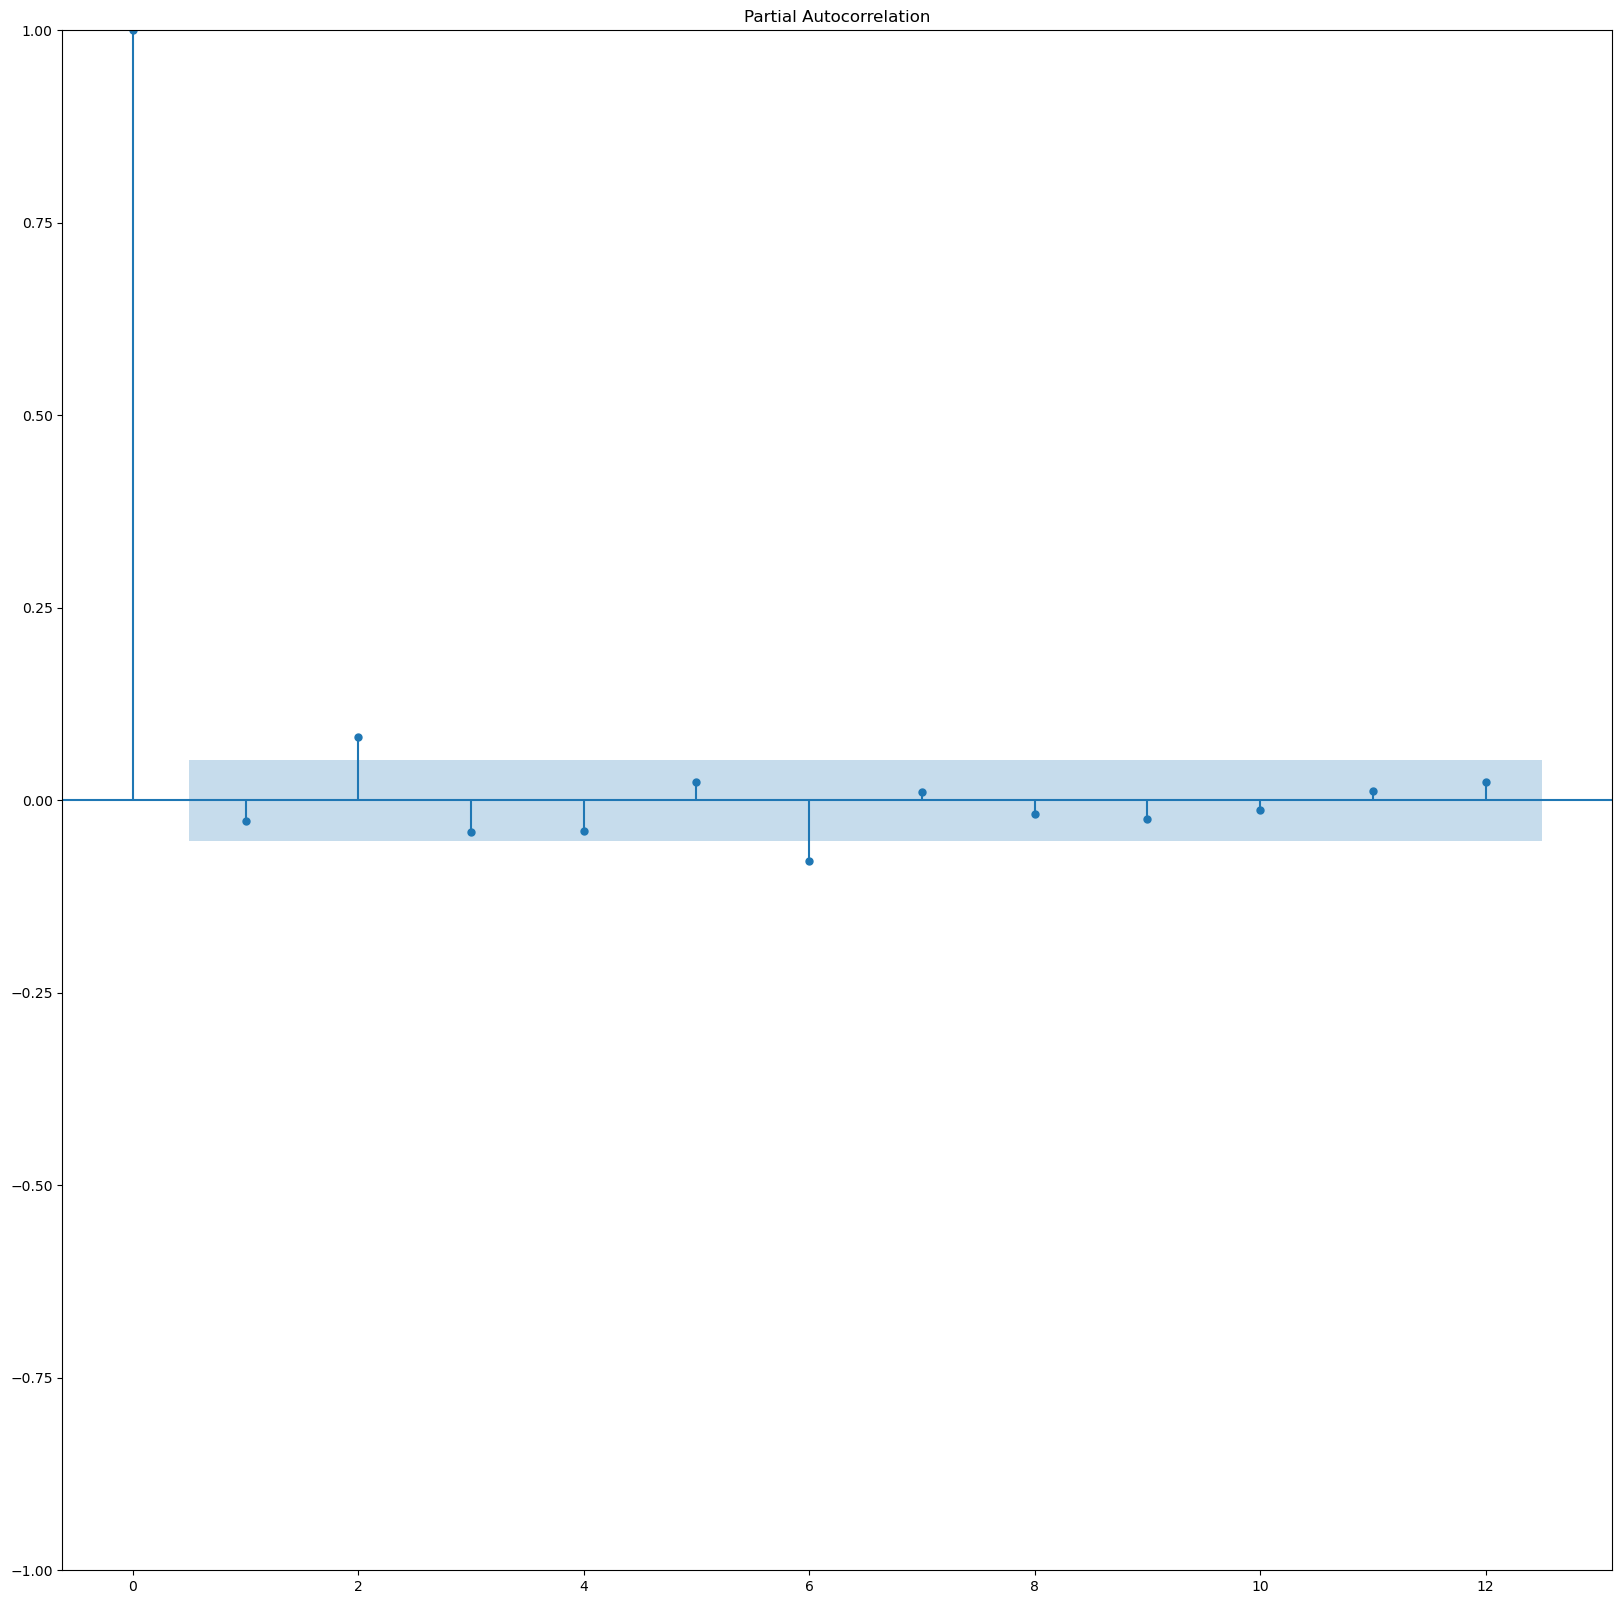

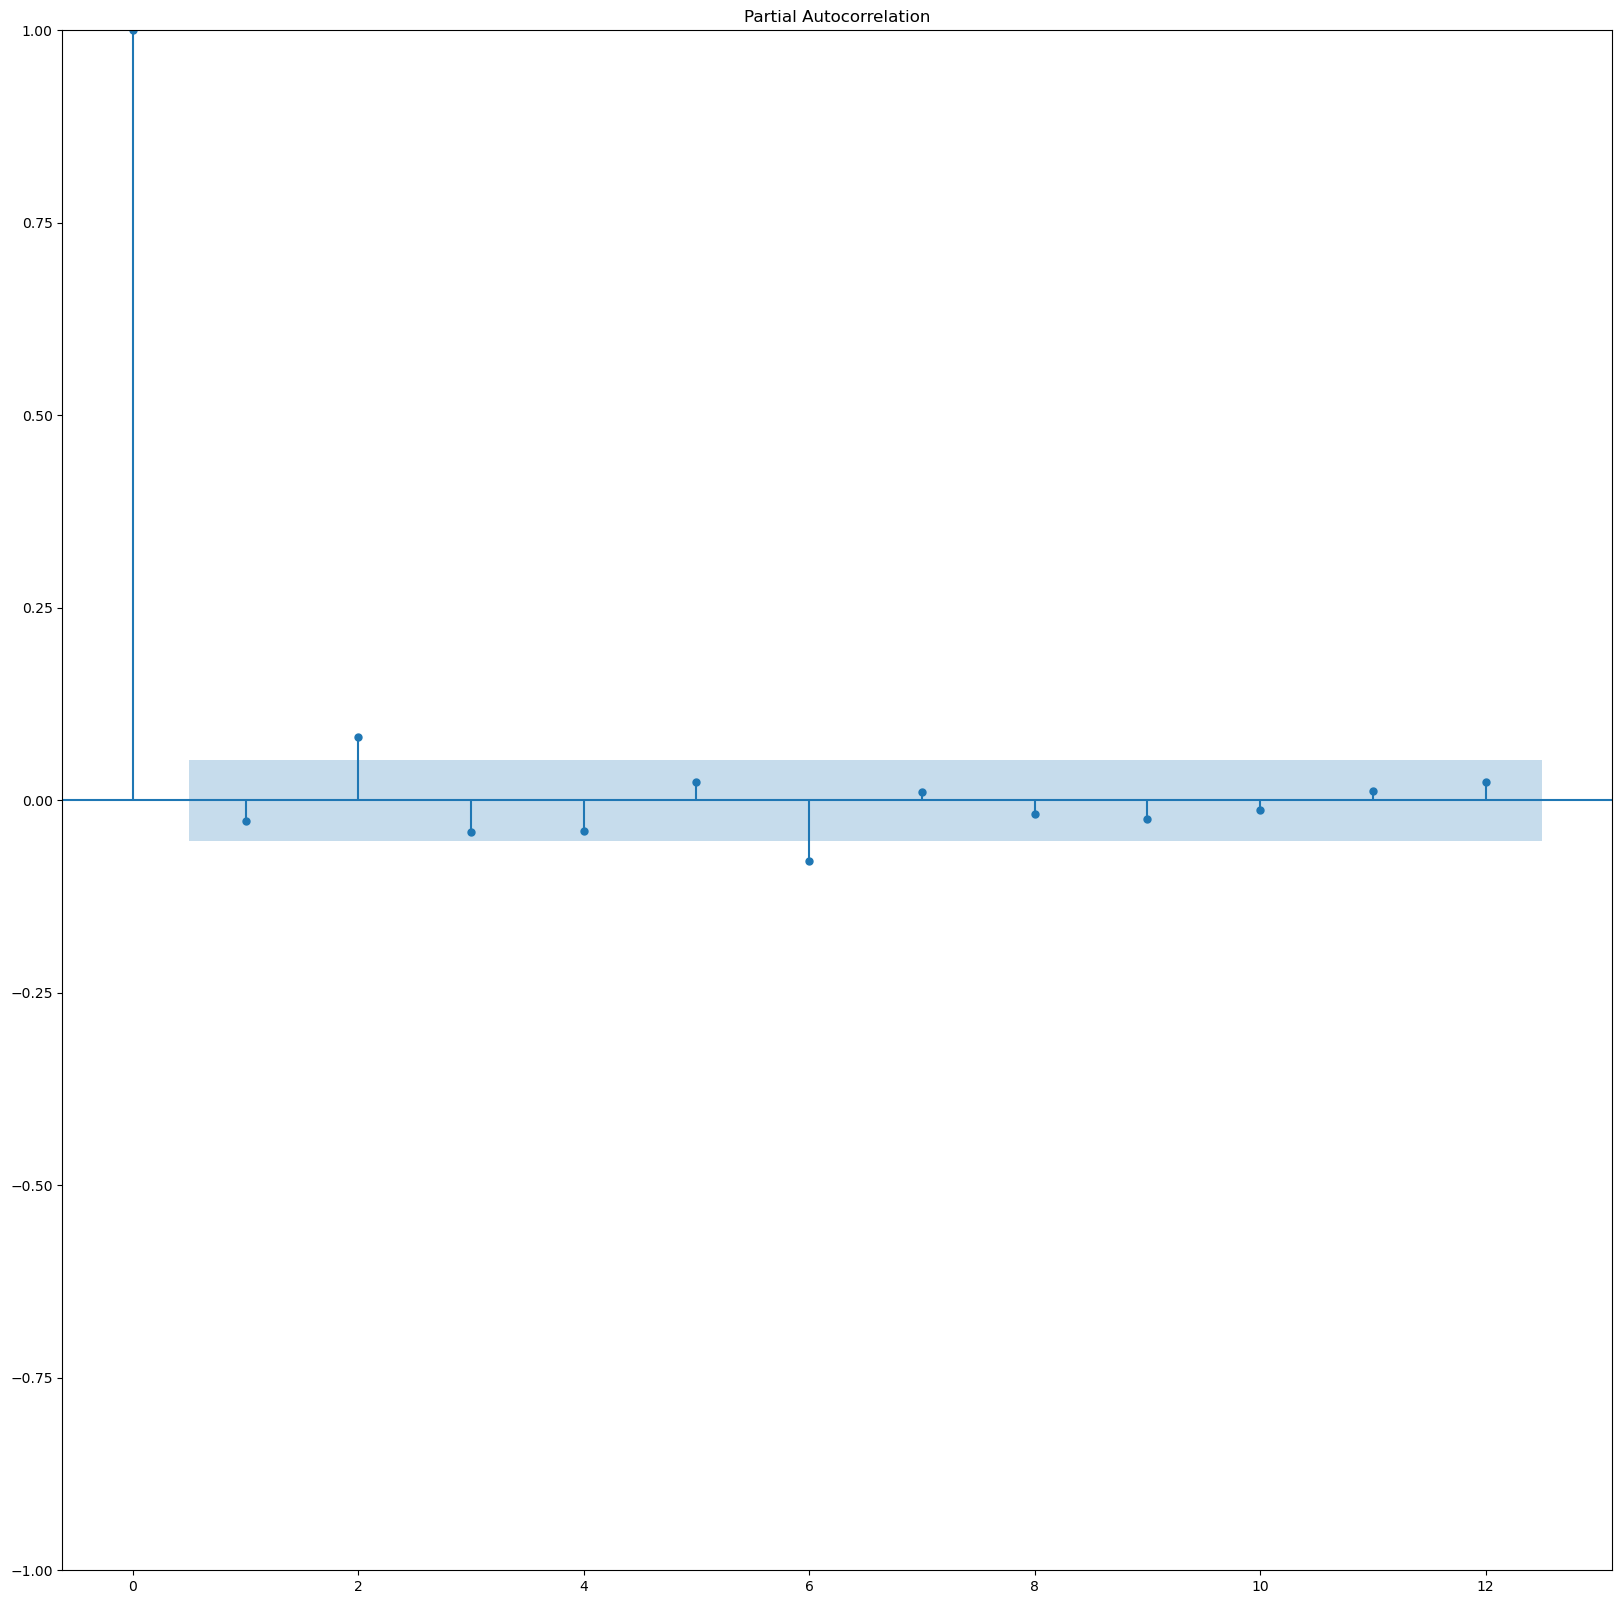

In [16]:
N, M = 20, 20
fig, ax = plt.subplots(figsize=(N, M))

pacf_values_high_price = pacf(log_close_returns,nlags=12)
plot_pacf(log_close_returns,lags=12, ax=ax)

In [40]:
# Model the shocks of the returns first using a GARCH model
# Then model using ARMA+GARCH model, since the returns look like volatile
# Most likely ARIMA(6,0,6) and zero the coefficients

# Here I will obtain the volatility and fit a GARCH model. 
# Following L6 Slide 53, we try to build either AR(6)+GARCH or MA(6)+GARCH (based on PACF and ACF above)

ar_order,ma_order = 0, 6 # AR and MA order respectively, based on ACF and PACF above

model = ARIMA(log_close_returns, order=(ar_order, 0, ma_order),enforce_invertibility=False) 
# Check the AR model, AR2 coef supposed to be significant from PACF plot, but does not show in coefficient below when you print model summary
# So I decided to proceed with order 0 for AR

model_fit = model.fit()
print(model_fit.summary())

constraints = {"ma.L1":0,"ma.L3":0,"ma.L4":0,"ma.L5":0}  # zero the insignificant coefficients but enforce_invertibility needs to be set to False
model_fit_constrained_zeroed_coef=model.fit_constrained(constraints)
print(model_fit_constrained_zeroed_coef.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1399
Model:                 ARIMA(0, 0, 6)   Log Likelihood                3069.077
Date:                Sun, 19 Oct 2025   AIC                          -6122.154
Time:                        00:02:01   BIC                          -6080.206
Sample:                             0   HQIC                         -6106.472
                               - 1399                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.836      0.403      -0.002       0.001
ma.L1         -0.0193      0.017     -1.123      0.261      -0.053       0.014
ma.L2          0.0786      0.017      4.560      0.0

In [42]:
# Get the residuals here to build the GARCH. Research paper says GARCH or GJW-GARCH is useful for something like OYX

residuals_from_ma6_model_zeroed_coef = model_fit_constrained_zeroed_coef.resid
print(residuals)

[ 0.02452697 -0.00314608 -0.01590178 ... -0.0131935   0.01942186
 -0.00088644]


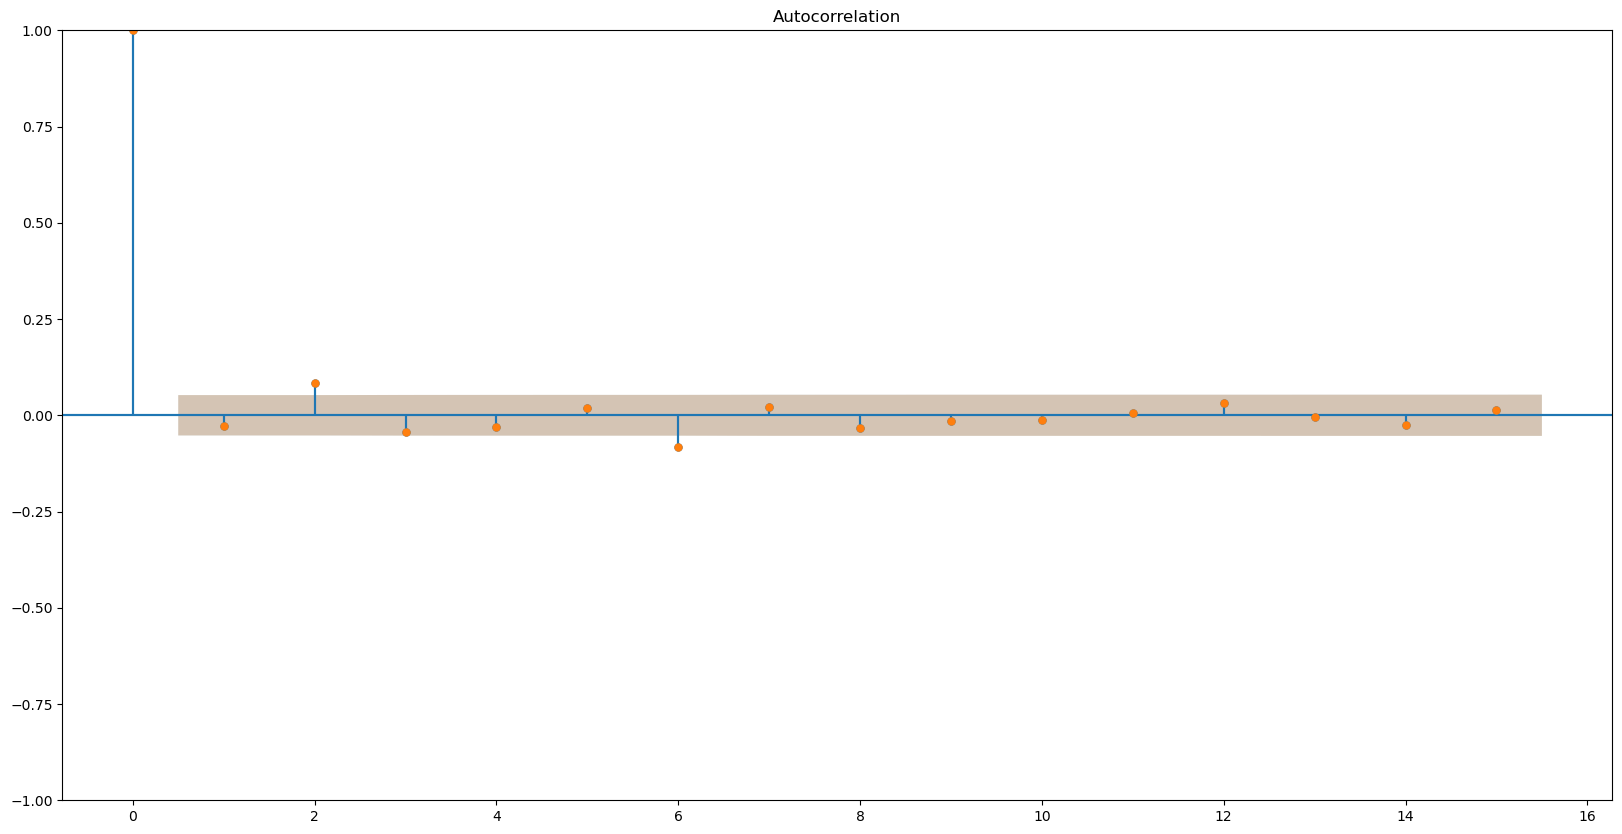

In [43]:
resq = residuals_from_ma6_model_zeroed_coef**2
acf_of_resq = acf(resq)
plot_acf(log_close_returns,lags=15,ax=ax)